## A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage)

1. Create a `data` folder in your local project repository.  
2. Download these two CSV files and place them in the data folder:

    a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look

    b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look

2.	Create a `notebooks` folder and launch a Jupyter Notebook in this folder. Give it a meaningful name.  
 - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
  - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.

3.	Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?
7662 rows and 4 columns


In [4]:
gdp_df.shape

(7662, 4)

In [12]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [11]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [16]:
gdp_df.Year.nunique()

33

In [45]:
group_by_country = gdp_df.groupby('Country')

In [46]:
group_and_filtered = group_by_country.filter(lambda x: x.Year.count() < 17)

In [47]:
group_by_country

In [48]:
group_and_filtered.Country.unique()

array(['Cayman Islands', 'Djibouti', 'Kosovo',
       'Sint Maarten (Dutch part)', 'Somalia', 'Turks and Caicos Islands'],
      dtype=object)

Countries that only have data for half of the years: 'Cayman Islands', 'Djibouti', 'Kosovo',
       'Sint Maarten (Dutch part)', 'Somalia', 'Turks and Caicos Islands'

In [49]:
gdp_df.groupby('Year').Country.count()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: Country, dtype: int64

90s have about 30 less countries then 2010s. That might be because some of those countries just didn't exist. During 90s in Europe specifically many independent countries were formed after the split of Soviet Union and Yugoslavia.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

(array([111.,  60.,  24.,  19.,  15.,   5.,   4.,   1.,   2.,   1.]),
 array([   711.35526342,  11815.35121222,  22919.34716101,  34023.3431098 ,
         45127.3390586 ,  56231.33500739,  67335.33095619,  78439.32690498,
         89543.32285377, 100647.31880257, 111751.31475136]),
 <BarContainer object of 10 artists>)

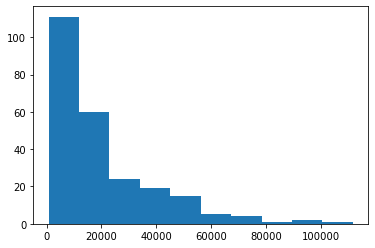

In [14]:
plt.hist(gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'])

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

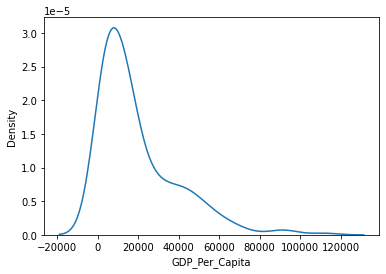

In [50]:
sns.kdeplot(gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'])

<AxesSubplot:ylabel='GDP_Per_Capita'>

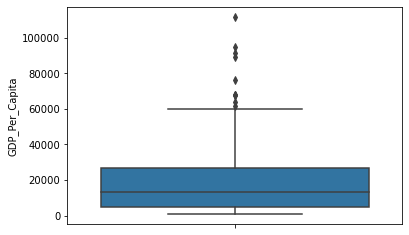

In [51]:
sns.boxplot(y=gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'])

<AxesSubplot:xlabel='GDP_Per_Capita'>

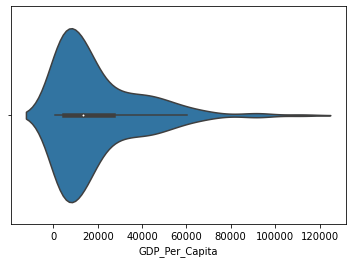

In [53]:
sns.violinplot(x=gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [73]:
gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [83]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

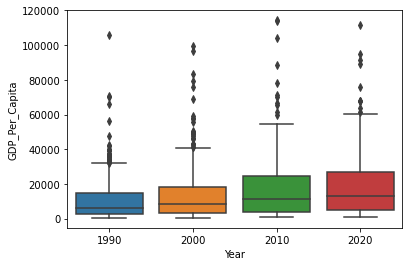

In [84]:
sns.boxplot(y = gdp_decades['GDP_Per_Capita'], x = gdp_decades['Year'])

In [ ]:
sns.boxplot(y = gdp_decades['GDP_Per_Capita'], x = gdp_decades['Year'])

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

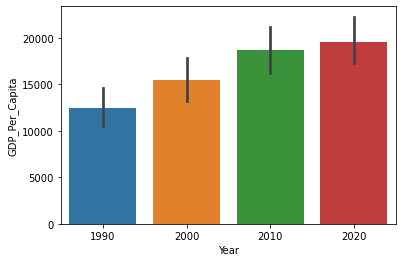

In [85]:
sns.barplot(y = gdp_decades['GDP_Per_Capita'], x = gdp_decades['Year'])

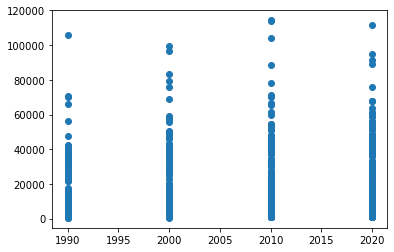

In [90]:
plt.scatter(y = gdp_decades['GDP_Per_Capita'], x = gdp_decades['Year'])

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

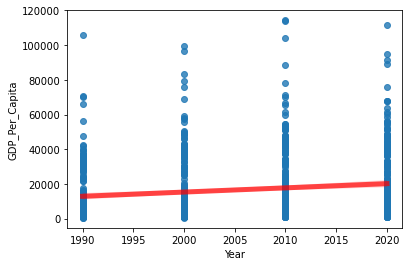

In [91]:
sns.regplot(y = gdp_decades['GDP_Per_Capita'], x = gdp_decades['Year'], line_kws={"color":"r","alpha":0.7,"lw":5})

Maaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaake a comment here!

11. Which country was the first to have a GDP per capita greater than $100,000? A: United Arab Emirates

In [93]:
gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. A: Luxembourg

In [95]:
gdp_df[gdp_df['Year'] == 2020].sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


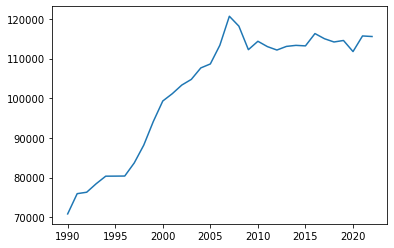

In [100]:
plt.plot( gdp_df[gdp_df['Country'] == "Luxembourg"]['Year'], gdp_df[gdp_df['Country'] == "Luxembourg"]['GDP_Per_Capita'])

13. Which country had the lowest GDP per capita in 2020? A: Burundi
Create a plot showing how this countrys GDP per capita has changed over the timespan of the dataset.
**Bonus question:** Is it true in general
that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 
1990?


In [101]:
gdp_df[gdp_df.Year == 2020].sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


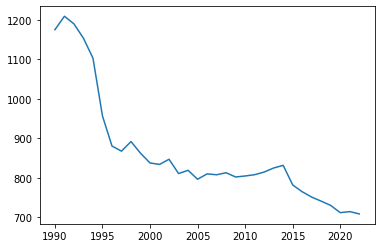

In [102]:
plt.plot(gdp_df[gdp_df.Country == 'Burundi'].Year, gdp_df[gdp_df.Country == 'Burundi'].GDP_Per_Capita)

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. 
Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [65]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip', nrows=4495)

In [63]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [106]:
internet_df.tail(10)

,Country,Year,Internet_Users_Pct
4485,Zimbabwe,2002,3.994356
4486,Zimbabwe,2001,0.799846
4487,Zimbabwe,2000,0.401434
4488,Zimbabwe,1999,0.161676
4489,Zimbabwe,1998,0.081648
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [103]:
internet_df = internet_df.drop('Value Footnotes', axis=1)

In [105]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [109]:
internet_df.sort_values('Year')

,Country,Year,Internet_Users_Pct
1663,Grenada,1960,0.00
665,Burundi,1960,0.00
3917,Syria,1960,0.00
2558,Maldives,1960,0.00
4018,Thailand,1960,0.00
...,...,...,...
929,Costa Rica,2014,49.41
2642,Mauritius,2014,41.44
953,Cote d'Ivoire,2014,14.60
3366,Saint Kitts and Nevis,2014,65.40


16. Look at the number of observations in this dataset per year. What do you notice?

In [108]:
internet_df.groupby('Year').count()

,Country,Internet_Users_Pct
Year,,
1960,7,7
1965,7,7
1970,7,7
1975,7,7
1976,7,7
1977,7,7
1978,7,7
1979,7,7
1980,7,7


17. What is the first year to have a non-zero internet users percentage value? A: 1990

In [111]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


18. How does the distribution of internet users percent differ for 2000 and 2014?

<AxesSubplot:xlabel='Internet_Users_Pct', ylabel='Count'>

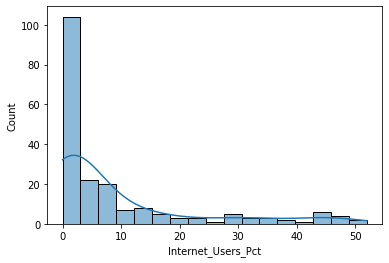

In [118]:
sns.histplot(data = internet_df[internet_df.Year == 2000], x = 'Internet_Users_Pct', kde=True)

<AxesSubplot:xlabel='Internet_Users_Pct', ylabel='Count'>

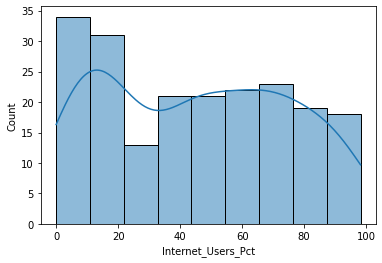

In [119]:
sns.histplot(data = internet_df[internet_df.Year == 2014], x = 'Internet_Users_Pct', kde=True)

19. For how many countries was the percentage of internet users below 5% in 2014? A: 16

In [127]:
int_2014_df = internet_df[internet_df.Year == 2014]

In [129]:
int_2014_df[int_2014_df['Internet_Users_Pct'] < 5].count()

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [139]:
gdp_and_internet_use = pd.merge(internet_df, gdp_df, on=['Country', 'Year'], how='outer')

In [140]:
gdp_and_internet_use.head()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.390000,2144.449634
1,Afghanistan,2013,5.900000,2165.340915
2,Afghanistan,2012,5.454545,2122.830759
3,Afghanistan,2011,5.000000,1961.096317
4,Afghanistan,2010,4.000000,2026.163818


In [141]:
gdp_and_internet_use.tail()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
8731,Zimbabwe,2016,NaN,2286.623549
8732,Zimbabwe,2015,NaN,2313.878553
8733,Zimbabwe,1993,NaN,2458.783255
8734,Zimbabwe,1992,NaN,2468.278257
8735,Zimbabwe,1991,NaN,2781.787843


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [149]:
top_3_internet = int_2014_df.sort_values('Internet_Users_Pct', ascending=False).head(3)['Country']

In [150]:
top_3_internet

1866    Iceland
415     Bermuda
3016     Norway
Name: Country, dtype: object

In [154]:
t3_internet_df = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_3_internet)]

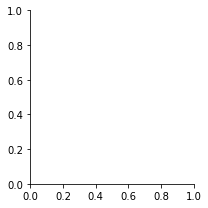

In [155]:
g = sns.FacetGrid(t3_internet_df)

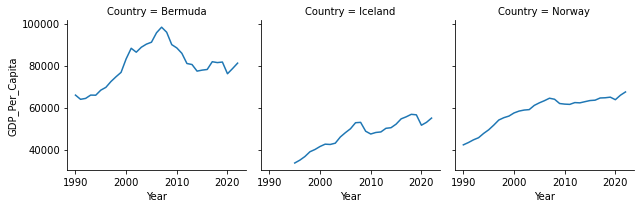

In [163]:
g = sns.FacetGrid(t3_internet_df, col='Country')
g.map(sns.lineplot,  'Year', 'GDP_Per_Capita');

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [165]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [166]:
gdp_and_internet_use_2014

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.39,2144.449634
15,Albania,2014,60.10,11586.817446
36,Algeria,2014,18.09,11561.259795
59,Andorra,2014,95.90,NaN
78,Angola,2014,21.26,8183.164577
...,...,...,...,...
8492,Turks and Caicos Islands,2014,NaN,24661.145053
8504,Tuvalu,2014,NaN,3521.328676
8578,Upper middle income,2014,NaN,14063.487284
8660,West Bank and Gaza,2014,NaN,5967.073437


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

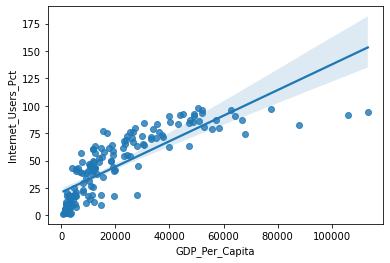

In [167]:
sns.regplot(x = gdp_and_internet_use_2014['GDP_Per_Capita'], y = gdp_and_internet_use_2014['Internet_Users_Pct'])

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [172]:
gdp_group = pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita,
        q=3,
        labels=['Low', 'Medium', 'High'])

In [175]:
type(gdp_group)

pandas.core.series.Series

In [179]:
gdp_and_internet_use_2014['GDP_group'] = gdp_group
gdp_and_internet_use_2014.head()

C:\Users\koste\AppData\Local\Temp\ipykernel_2736\902600929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = gdp_group;


,Country,Year,Internet_Users_Pct,GDP_Per_Capita,GDP_group
0,Afghanistan,2014,6.39,2144.449634,Low
15,Albania,2014,60.10,11586.817446,Medium
36,Algeria,2014,18.09,11561.259795,Medium
59,Andorra,2014,95.90,NaN,NaN
78,Angola,2014,21.26,8183.164577,Medium


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [183]:
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

GDP_group
Low       10.6
Medium    43.4
High      78.7
Name: Internet_Users_Pct, dtype: float64






### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.